In [ ]:
from sphedron.utils.extra import get_mesh_landmask
from sphedron.utils.extra import plot_2d_mesh, plot_3d_mesh
from sphedron.transfer import MeshTransfer
from sphedron.mesh import UniformMesh
import numpy as np

In [2]:
uni_mesh = UniformMesh()
sender_mesh = UniformMesh()

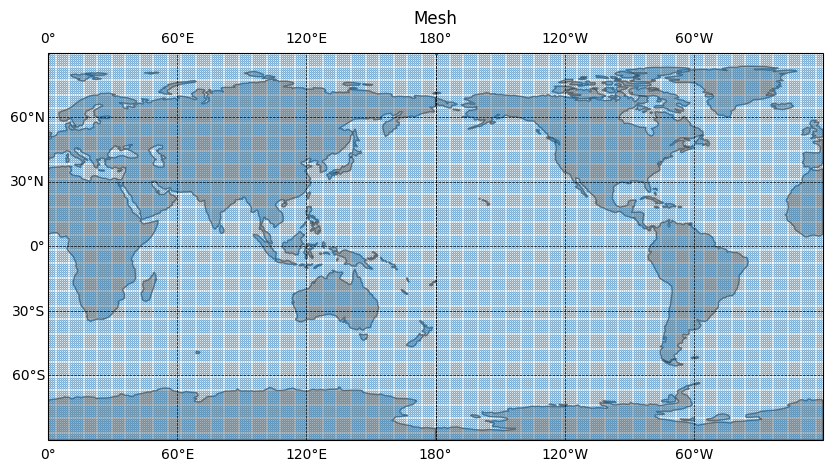

In [3]:
plot_2d_mesh(uni_mesh, scatter=True)

In [3]:
sender_mesh.mask_nodes(get_mesh_landmask(sender_mesh))

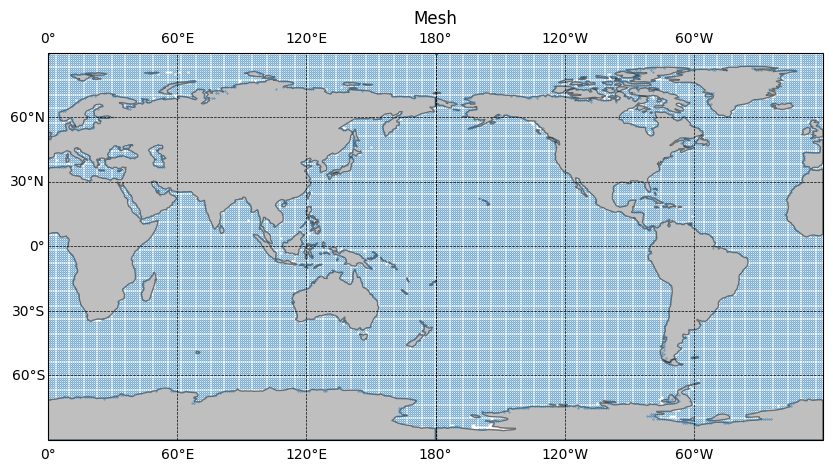

In [5]:
plot_2d_mesh(sender_mesh, scatter=True)

In [4]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib.colors import Normalize, TwoSlopeNorm
from cartopy import feature, util
import numpy as np


def cartplot_uniform_grid(
    uniform_values,
    lat_linspace,
    long_linspace,
    title,
    figsize=(18, 9),
    cover_land=True,
    unit="cm",
):
    resolution=110
    assert uniform_values.shape[0] == lat_linspace.shape[0]
    assert uniform_values.shape[1] == long_linspace.shape[0]
    plt.figure(figsize=figsize)
    cyclic_map, cyclic_long = util.add_cyclic_point(uniform_values, long_linspace)
    ax = plt.axes(projection=ccrs.PlateCarree())
    v_min = cyclic_map.min()
    v_max = cyclic_map.max()
    ax.set_global()
    ax.coastlines(resolution=f"{resolution}m", linewidth=1)
    ax.gridlines(linestyle="--", color="black")


    levels = np.linspace(v_min, v_max, 60)
    resolution = 110
    plt.title(title)
    plt.contourf(
        cyclic_long,
        lat_linspace,
        cyclic_map,
        levels=levels,
        transform=ccrs.PlateCarree(),
        corner_mask=True,
        cmap="coolwarm",
        antialiased=False,
        # mask=mask,
    )
    if cover_land:
        ax.add_feature(feature.LAND, facecolor="white", zorder=10)
    ax.coastlines(resolution=f"{resolution}m", linewidth=1)
    cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
    cb.set_label(unit, size=12, rotation=0, labelpad=15)
    cb.ax.tick_params(labelsize=12)

    plt.show()

In [ ]:
from sphedron.transform import xyz_to_thetaphi
sender_thetaphi = xyz_to_thetaphi(sender_mesh.nodes)
sender_values = np.cos(sender_thetaphi[:,0]*5) * np.cos(sender_thetaphi[:,1]*4)

In [6]:
sender_uni_transfer = MeshTransfer(sender_mesh=sender_mesh, receiver_mesh=uni_mesh, n_neighbors=1)

In [7]:
values = sender_uni_transfer.transfer(sender_values)

In [9]:
values.shape

(65160,)

In [10]:
vals = uni_mesh.reshape(values)

In [11]:
vals.shape

(181, 360)

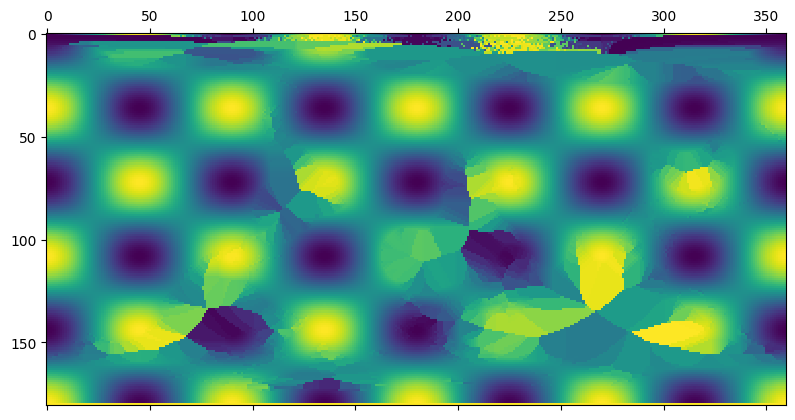

In [12]:
plt.matshow(vals)

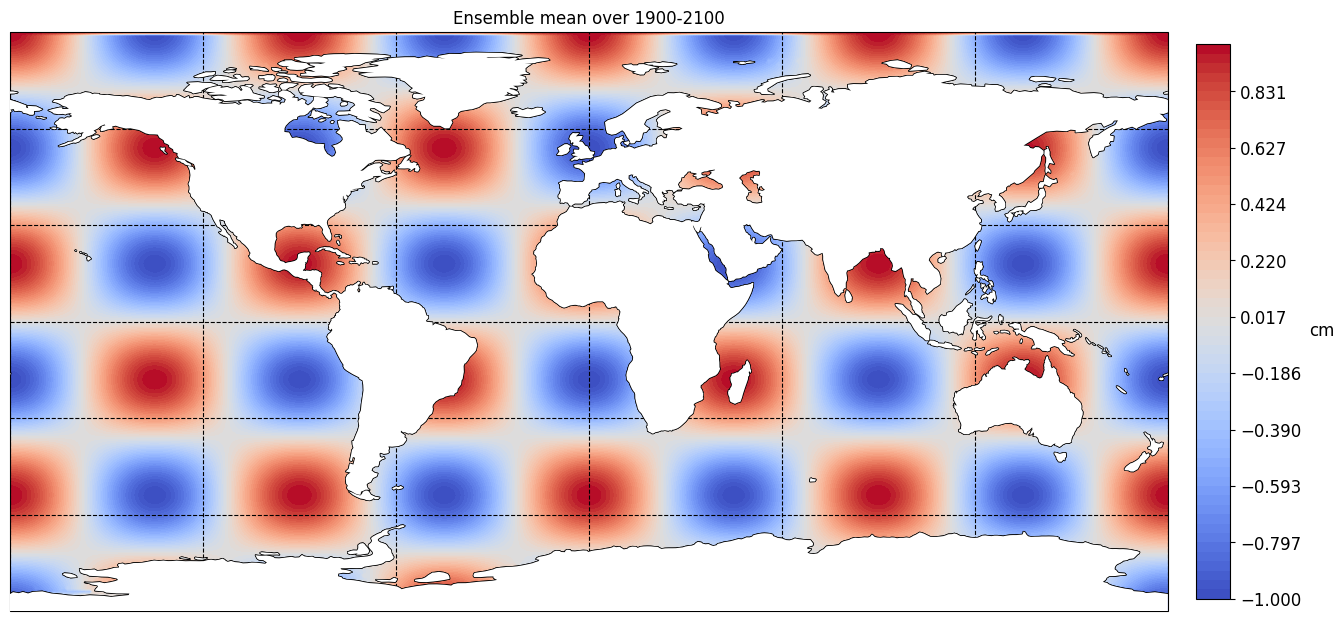

In [13]:
cartplot_uniform_grid(vals, uni_mesh.uniform_lat, uni_mesh.uniform_long, "Ensemble mean over 1900-2100")